# 01 - Введение

## Основные понятия

### Задача

Пусть есть
* $X$ - множество объектов
* $Y$ - множество ответов

И мы предполагаем, что есть некоторая неизвестная завимимость **(target function)**, которую мы хотим приблизить

$$y: X \rightarrow Y$$

При этом у нас есть ограниченная обучающая выборка 
* $X^{\mathcal{l}} = \{ x_1, \dots, x_{\mathcal{l}}\} \subset X$ - обучающая выборка **(training set)**
* $y_i = y(x_i) \in Y $ - для каждого объекта из выборки известен ответ

Наша задача найти алгоритм $a: X \rightarrow Y$, который является некоторой решающий функцией **(decision function)**, приближающей $y$ на всем $X$.

### Признаковое описание

Каждый объект $x = (x^1, \dots, x^n)$ представляется вектором признаков **(features)** , которые могут быть разной природой $x^i \in D^i$.

Типы признаков:
* $D = \{0, 1\}$ - бинарный признак
* $|D| < \infty$ - номинальный признак
* $D = \{1, \dots, k\}$ - порядковый признак (D порядочено)
* $D = \mathbb{R}$ - количественный признак

### Типы задач

Задача классификации **(classification)**
* $Y = \{-1, +1\}$ - бинарная классификаци
* $Y = \{1, \dots ,M\}$ - классификация на $M$ классов
* $Y = \{0, 1\}^M$ - классификация на $M$ пересекающихся классов

Задача восстановления регрессии **(regression)**
* $Y = \mathbb{R}$ - нахождение зависимости
* $Y = \mathbb{R}^M$ - таргет может быть и многомерным

Задач ранжирования **(learning to rank)**
* $Y$ - конечное упорядоченное множество


### Пример

Давайте рассмотрим классический набор данных [Ирисы Фишера](https://en.wikipedia.org/wiki/Iris_flower_data_set), заодно начнем знакомиться с нашими библиотеками. Для этого нам понадобится следующий список

* [numpy](https://docs.scipy.org/doc/)
* [scipy](https://docs.scipy.org/doc/scipy/reference/)
* [sklearn](http://scikit-learn.org/stable/modules/classes.html)
* [matplotlib](http://matplotlib.org)

In [42]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

%matplotlib inline

iris = load_iris()
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Отобразим классы разными цветами в двух разных срезах

In [87]:
def show_iris(axis_x, axis_y):
    colors = ['red', 'blue', 'green']

    plt.figure(figsize=(12, 6))
    plt.xlabel(iris['feature_names'][axis_x])
    plt.ylabel(iris['feature_names'][axis_y])

    for label, (name, color) in enumerate(zip(iris['target_names'], colors)):
        index = (iris['target'] == label)
        plt.scatter(
            x = iris['data'][index, axis_x], 
            y = iris['data'][index, axis_y],
            s = 80,
            alpha = 0.5,
            c = color,
            label = name,
        )
    
    plt.legend()

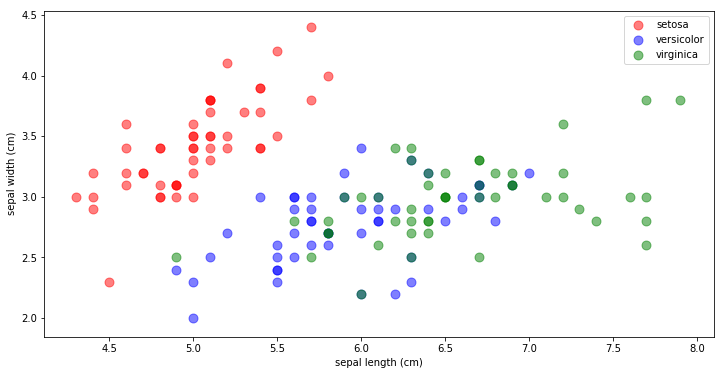

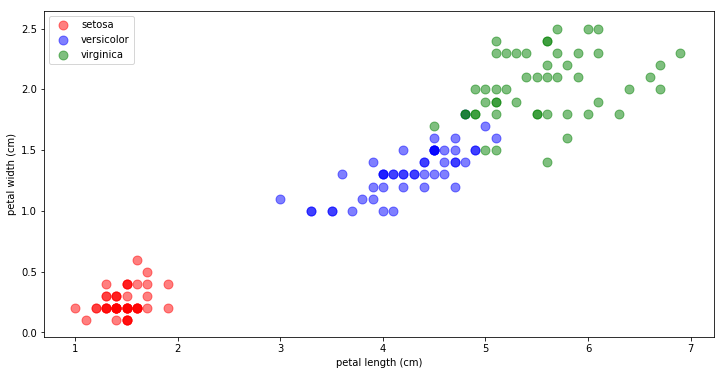

In [90]:
show_iris(0, 1)
show_iris(2, 3)

### Предсказательная модель

Модель **(predictive model)** - некоторое семейство функций, которое обычно задается набором параметров. К примеру, наиболее распространненой является линейная модель, которая задается набором весов $w \in \mathbb{R}^n$. Тогда задача регрессии может быть записана следующим образом

$$ a(x|w) = \sum_i w^i x^i = wx$$

А задача классификация выглядит

$$a(x|w) = sgn \big( \sum_i w^i x^i \big) = sgn(wx)$$

Обучение **(training)** заключается в том, чтобы найти $w$, которое максимально приблизит $a$ к $y$ на обучающей выборке $\{ x_i\}_{i=1}^{\mathcal{l}}$. А после чего решающее правило применяетя дли примером с неизвстным $y$ **(testing)**.

**Функция потерь**

Для обучения модели вводится понятия функции потерь **(loss function)**. $\mathcal{L}(a, x)$ - это величина ошибки алгоритма $a(x|w)$ на объекте $x$. Для классификации наиболее естественной функцией потерь является 

$$\mathcal{L}(a, x) = [ y \neq a(x) ].$$

А для регрессии можно использовать функции квадратичной ошибки

$$\mathcal{L}(a, x) = (y - a(x))^2.$$

Средняя ошибка на всем обучающем множестве называется эмпирическим риском

$$Q(a, X^{\mathcal{l}}) = \frac{1}{\mathcal{l}}\sum_x \mathcal{L}(a, x).$$

### Обучение, как задача оптимизации

В большинстве случаем задача обучения сводится к некоторой задаче оптимизации
$$\arg \min_a Q(a, X^{\mathcal{l}}).$$

К примеру, задачу регрессии можно свести к методу наименьших квадратов
$$\arg \min_w \frac{1}{l} \sum_x (y - wx)^2.$$

**Задание**

Попробуйте найти точное решение для задачи $$\arg \min_w \sum_x (y - wx)^2.$$ Для это достаточно вычислить производную по $w$ и прировнять ее к нулю. В дальнейшем задача сводится к уравнению
$$X^T Xw = X^T y$$
где $X$ - матрица состоящая из векторов $x$ обучающей выборки, записанных в виде строк. Если все строки $X$ линейно независимы, то сущесвует решение
$$w = (X^T X)^{-1}X^T y.$$

### Проблема переобучения

Обучение сводиться к оптимизации эмпирического риска на обучающей выборке. Однако нужно понимать, что конечной целью является хорошая работа алгоритма во время тестирования. И это важно понимать. Таким образом появляется понятие переобучение **(overfitting)**, когда наш алгоритм очень хорошо отвечает на обучающей выборке, но качество на тестовой выборке плохое.

Рассмотрим это на примере регрессии. Пусть есть некоторая функция.

In [ ]:
import numpy as np

def y(x):
   return 1/(1 + 25 * x*x)

Сгенерируем точки для обучения и тестирования и отобразим зависимость. Красными точками отображена обучающая выборка.

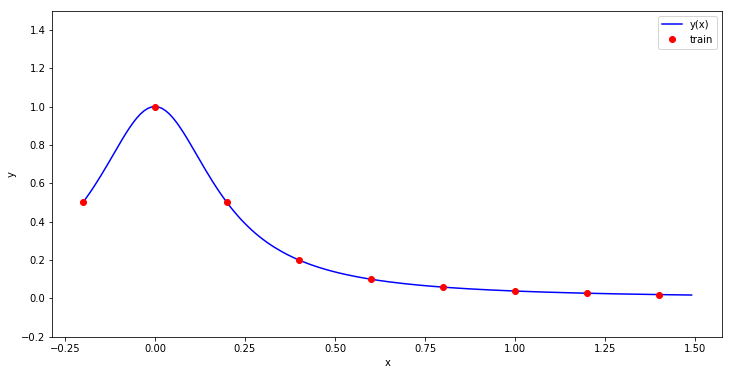

In [323]:
min_x, max_x = -0.2, 1.5
min_y, max_y = -0.2, 1.5

x_train = np.arange(min_x, max_x, 0.2)
x_test = x_train + 0.1

y_train = y(x_train)
y_test = y(x_test)

plt.figure(figsize=(12, 6))
plt.xlabel('x')
plt.ylabel('y')

x = np.arange(min_x, max_x, 0.01)

plt.plot(x, y(x), 'b-', label='y(x)')
plt.plot(x_train, y_train, 'ro', label='train')
plt.ylim(min_y, max_y)

plt.legend();

Опишем функцию, которая генерирует признак вида $1, x, x^2, \dots, x^n$.

In [409]:
def generate(x, feature_n=5):
    features = [np.ones(shape=x.shape)]
    for _ in range(0, feature_n):
        feature = features[-1] * x
        features.append(feature)
        
    return np.vstack(features).T

Опишем класс, который обучает линенйную модель на основе метода наименьших квадратов.

In [410]:
class Classifier:
    
    def fit(self, X_train, y_train):
        self.w_ = np.linalg.inv(X_train.T @ X_train) @ X_train.T  @ y_train
        return self

    def predict(self, X_test):
        return X_test @ self.w_

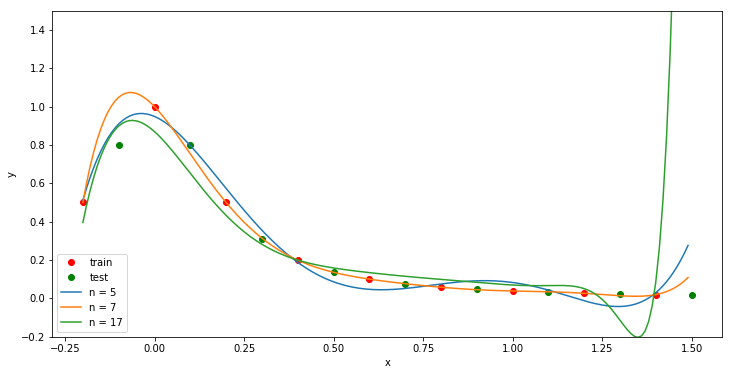

In [416]:
plt.figure(figsize=(12, 6))
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_train, y_train, 'ro', label='train')
plt.plot(x_test, y_test, 'go', label='test')
plt.ylim(min_y, max_y)

for feature_n in [5, 7, 17]:
    X = generate(x, feature_n)
    X_train = generate(x_train, feature_n)

    clf = Classifier().fit(X_train, y_train)
    y_pred = clf.predict(X)

    plt.plot(x, y_pred, label='n = %i' % feature_n)

    plt.legend();

Как можно видеть, при $n=3$ наша модель достаточно грубая, при $n=5$ мы имеем хорошее приближение, а при $n = 17$ модель переобучается. 